In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import Data

df = pd.read_csv('Steel_industry_data.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [3]:
# Set DateTime as index 

def date_to_index(dataframe, date_colname):
    dataframe = dataframe.set_index(date_colname)
    dataframe.index = pd.to_datetime(dataframe.index)
    return dataframe

new_df = date_to_index(df, 'date')
new_df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
date,,,,,,,,,,
2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [9]:
# Extra: rename columns with long names

new_df.rename(columns = {'Leading_Current_Reactive_Power_kVarh':'leading_crp', 
                         'Lagging_Current_Reactive.Power_kVarh':'lagging_crp',
                         'Leading_Current_Power_Factor':'leading_cpf',
                         'Lagging_Current_Power_Factor':'lagging_cpf'}, inplace = True)

In [12]:
# Create features from DateTime elements

def create_features(df):
    df = df.copy()
    
    df['hour'] = df.index.hour
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['year'] = df.index.year
    
    df['dayofweek'] = df.index.dayofweek
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(new_df)
df.head()

,Usage_kWh,lagging_crp,leading_crp,CO2(tCO2),lagging_cpf,leading_cpf,NSM,WeekStatus,Day_of_week,Load_Type,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,,,,,,,,,,,
2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,0,0,1,1,2018,1,1,1
2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,0,0,1,1,2018,1,1,1
2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,0,0,1,1,2018,1,1,1
2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,1,0,1,1,2018,1,1,1
2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,1,0,1,1,2018,1,1,1


---

# Visualizations

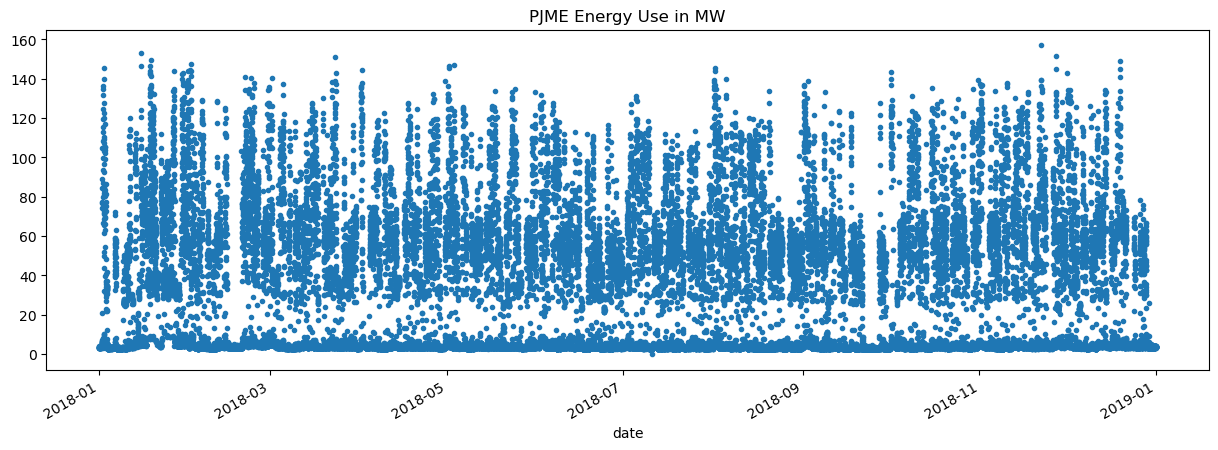

In [17]:
params = {'dataframe': new_df, 
          'marker_symbol': '.',
          'figsize': (15,5), 
          'title': 'PJME Energy Use in MW', 
          'y_column': 'Usage_kWh'}

def time_series_plot(dataframe, marker_symbol, figsize, title, y_column):
    dataframe[y_column].plot(style = marker_symbol,
                             figsize = figsize,
                             color = sns.color_palette()[0],
                             title = title)
    return plt.show()

time_series_plot(**params)

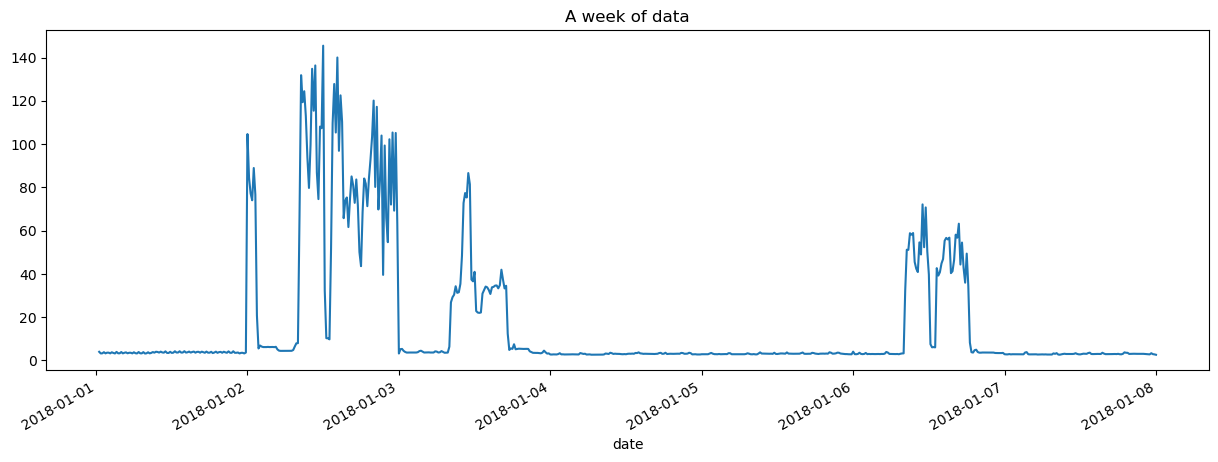

In [28]:
params = {'dataframe': df, 
          'figsize': (15,5),
          'y_colname': 'Usage_kWh',
          'starting_datetime': '2018-01-01 00:15:00', 
          'ending_datetime': '2018-01-08 00:15:00', 
          'title': 'A week of data'}

def plot_one_week_ts(dataframe, figsize, y_colname, starting_datetime, ending_datetime, title):
    df[y_colname].loc[(df.index > starting_datetime) & (df.index < ending_datetime)] \
                 .plot(figsize = figsize, title=title)
    return plt.show()

plot_one_week_ts(**params)